In [14]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

C:\Users\idirt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
path.ls()

(#2) [Path('C:/Users/idirt/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/idirt/.fastai/data/oxford-iiit-pet/images')]

In [16]:
(path/"images").ls()

(#7393) [Path('C:/Users/idirt/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/idirt/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/idirt/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/idirt/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.mat'),Path('C:/Users/idirt/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),Path('C:/Users/idirt/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.mat'),Path('C:/Users/idirt/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),Path('C:/Users/idirt/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.mat'),Path('C:/Users/idirt/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),Path('C:/Users/idirt/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg')...]

In [17]:
fname = (path/"images").ls()[0]

In [18]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Abyssinian']

In [19]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files, splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

In [20]:
item_tfms = Resize(460),
batch_tfms = aug_transforms(size=224, min_scale=0.75)

Проверка и отладка DataBlock

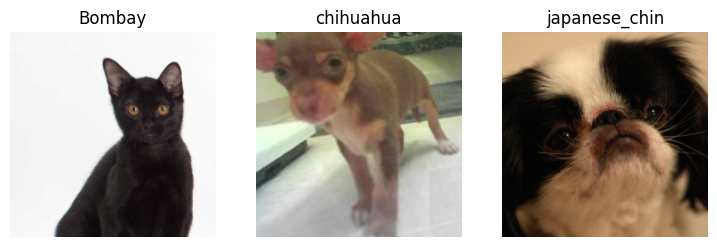

In [21]:
dls.show_batch(nrows=1, ncols=3)

In [23]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

C:\Users\idirt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,1.496310,0.344809,0.114344,00:52


epoch,train_loss,valid_loss,error_rate,time
0,0.518001,0.302351,0.102842,00:56
1,0.340230,0.214424,0.073072,00:57


In [24]:
x, y = dls.one_batch()

In [25]:
y

TensorCategory([18, 35,  3, 13, 17, 23, 25, 21,  3, 15, 30,  3, 25,  0, 32, 30,
                12, 17, 21, 13, 20, 34,  3,  0,  5,  7,  1,  7, 11,  2, 27, 18,
                29, 28, 32,  9,  5, 36,  1, 19, 14, 20, 24, 26, 18, 27, 31, 28,
                 6,  0,  0,  2, 32,  6,  9, 10, 16, 12, 23, 12,  1, 11,  5, 10],
               device='cuda:0')

In [26]:
preds, _ = learn.get_preds(dl=[(x, y)])
preds[0]

tensor([6.8952e-06, 3.5565e-06, 8.8738e-07, 5.3475e-06, 1.0687e-07, 6.2501e-07,
        6.0790e-06, 4.7161e-06, 1.0839e-05, 2.7666e-06, 2.6169e-05, 1.0958e-05,
        1.6287e-05, 1.0484e-06, 2.8309e-05, 2.4207e-06, 1.7657e-06, 1.6586e-05,
        9.7479e-01, 1.2974e-02, 4.4525e-06, 1.1419e-06, 9.3371e-03, 2.3594e-03,
        6.8959e-06, 1.9351e-06, 1.1379e-06, 1.0267e-04, 8.3423e-06, 3.5334e-06,
        2.9989e-05, 6.5353e-07, 3.1522e-05, 2.0006e-06, 1.9091e-06, 3.8669e-05,
        1.5623e-04])

In [27]:
len(preds[0]), preds[0].sum()

(37, tensor(1.))

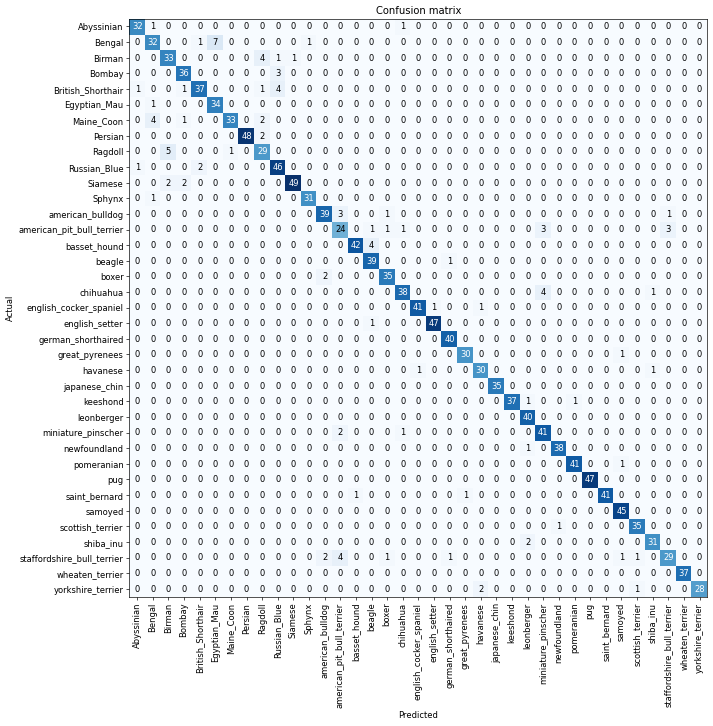

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [32]:
interp.most_confused(min_val=5)

[('Bengal', 'Egyptian_Mau', 7), ('Ragdoll', 'Birman', 5)]

Улучшение модели

C:\Users\idirt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


ValueError: not enough values to unpack (expected 2, got 1)

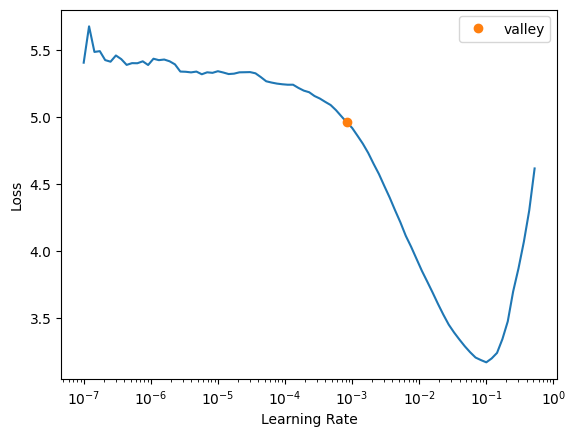

In [33]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find()

In [35]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.312113,0.315585,0.110961,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.541714,0.352149,0.114344,00:57
1,0.334149,0.218326,0.071042,00:57


In [36]:
learn.fine_tune??

Signature:
learn.fine_tune(
    epochs,
    base_lr=0.002,
    freeze_epochs=1,
    lr_mult=100,
    pct_start=0.3,
    div=5.0,
    *,
    lr_max=None,
    div_final=100000.0,
    wd=None,
    moms=None,
    cbs=None,
    reset_opt=False,
    start_epoch=0,
)
Source:   
@patch
@delegates(Learner.fit_one_cycle)
def fine_tune(self:Learner, epochs, base_lr=2e-3, freeze_epochs=1, lr_mult=100,
              pct_start=0.3, div=5.0, **kwargs):
    "Fine tune with `Learner.freeze` for `freeze_epochs`, then with `Learner.unfreeze` for `epochs`, using discriminative LR."
    self.freeze()
    self.fit_one_cycle(freeze_epochs, slice(base_lr), pct_start=0.99, **kwargs)
    base_lr /= 2
    self.unfreeze()
    self.fit_one_cycle(epochs, slice(base_lr/lr_mult, base_lr), pct_start=pct_start, div=div, **kwargs)
File:      c:\users\idirt\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages\fastai\callback\schedule.py
Type:      met

In [37]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.107734,0.292020,0.104195,00:53
1,0.550349,0.276404,0.087957,00:52
2,0.331977,0.220227,0.071719,00:51


In [38]:
learn.unfreeze()

SuggestedLRs(valley=2.511886486900039e-05)

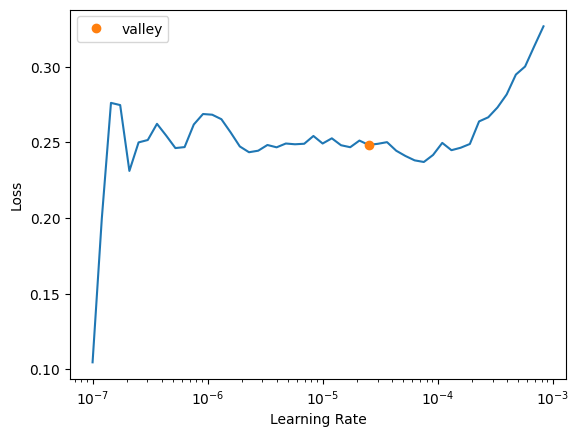

In [39]:
learn.lr_find()

In [40]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.269259,0.210306,0.067659,00:57
1,0.247488,0.206222,0.069689,00:56
2,0.218457,0.193362,0.061570,00:57
3,0.199885,0.188646,0.060217,00:56
4,0.188034,0.188589,0.059540,00:56
5,0.180419,0.190044,0.062923,00:56


In [41]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.145823,0.293586,0.100812,00:51
1,0.533925,0.235083,0.079161,00:50
2,0.321538,0.191061,0.056157,00:50


In [42]:
learn.unfreeze()

In [43]:
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.266481,0.185261,0.052097,00:58
1,0.240573,0.186693,0.056157,00:58
2,0.238641,0.182676,0.054804,00:58
3,0.213631,0.187975,0.058187,00:56
4,0.177122,0.174031,0.049391,00:57
5,0.164624,0.174561,0.050744,00:56
6,0.152174,0.166254,0.046008,00:56
7,0.139164,0.167620,0.052097,00:57
8,0.123724,0.167467,0.050068,00:57
9,0.136492,0.167780,0.049391,00:57


In [44]:
learn.fit_one_cycle(6, lr_max=slice(1e-7, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.121529,0.164791,0.048038,00:59
1,0.130055,0.166600,0.050744,01:01
2,0.116549,0.165073,0.048714,00:59
3,0.113899,0.163758,0.047361,01:00
4,0.100689,0.168667,0.047361,01:00
5,0.101759,0.163956,0.046685,01:00


In [45]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,2.229134,0.461633,0.136671,00:55
1,0.855132,0.280275,0.089310,00:53
2,0.576587,0.278698,0.085250,00:56


epoch,train_loss,valid_loss,error_rate,time
0,0.303049,0.222766,0.074425,01:00
1,0.244725,0.246334,0.076455,00:57
2,0.198208,0.212005,0.062246,01:03
3,0.138414,0.195127,0.060217,01:04
4,0.081192,0.187022,0.052097,01:04
5,0.066779,0.184583,0.050744,00:57
